In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = 'elektrik_veri.xlsx'
xls = pd.ExcelFile(file_path)

In [3]:
df_tahsilat = pd.read_excel(xls, sheet_name='Tahsilat')
df_tahsilat_1 = pd.read_excel(xls, sheet_name='Tahsilat 1')
df_tahakkuk = pd.read_excel(xls, sheet_name='Tahakkuk')
df_tahakkuk_1 = pd.read_excel(xls, sheet_name='Tahakkuk 1')
df_tahakkuk_2 = pd.read_excel(xls, sheet_name='Tahakkuk 2')

In [4]:
odeme_sutunlari = ['Nakit Tahsilat', 'Mahsuben Tahsilat', 'Kredi Kartı Tahsilatı', 'Banka Tahsilatı']
df_tahsilat[odeme_sutunlari] = df_tahsilat[odeme_sutunlari].fillna(0)

In [5]:
df_tahsilat['Toplam_Tahsilat'] = df_tahsilat[odeme_sutunlari].sum(axis=1)

In [6]:
zamanlama_sutunlari = [
    'Son Ödeme Tarihinden Önceki Tahsilat',
    'Son Ödeme Tarihindeki Tahsilat',
    'Son Ödeme (1)',
    'Son Ödeme (2)',
    'Son Ödeme (3)',
    'Son Ödeme (4)',
    'Son Ödeme (5)',
    'Son Ödeme (6-10)',
    'Son Ödeme (10-20)',
    'Son Ödeme (20-30)',
    'Son Ödeme (30-60)',
    'Son Ödeme (60-90)',
    'Son Ödeme (90-120)',
    'Son Ödeme (120-150)',
    'Son Ödeme (150-180)',
    'Son Ödeme (180+)'
]

df_tahsilat_1[zamanlama_sutunlari] = df_tahsilat_1[zamanlama_sutunlari].fillna(0)

In [7]:
import pandas as pd
# Tahakkuk sayfalarını birleştirme
df_listesi = [df_tahakkuk, df_tahakkuk_1, df_tahakkuk_2]
df_toplam_tahakkuk = pd.concat(df_listesi, ignore_index=True)

In [8]:
onceki_sayi = len(df_toplam_tahakkuk)
df_tahakkuk_temiz = df_toplam_tahakkuk[df_toplam_tahakkuk['kwh'] >= 0].copy()

In [9]:
negatif_sayisi = onceki_sayi - len(df_tahakkuk_temiz)
print(f"\nTemizlenen Negatif kWh Kayıt Sayısı: {negatif_sayisi}")


Temizlenen Negatif kWh Kayıt Sayısı: 151


In [10]:
print("\nGüncel kWh İstatistikleri:")
print(df_tahakkuk_temiz['kwh'].describe())


Güncel kWh İstatistikleri:
count    1.185547e+06
mean     9.274859e+01
std      9.500024e+02
min      0.000000e+00
25%      1.802000e+01
50%      4.663000e+01
75%      8.000000e+01
max      1.535757e+05
Name: kwh, dtype: float64


In [11]:
ilce_bazli_musteri = df_toplam_tahakkuk.groupby('ilce')['sozlesme_hesap_no'].nunique().sort_values(ascending=False)
print("İlçelere Göre Benzersiz Müşteri Sayıları:")
print(ilce_bazli_musteri)

İlçelere Göre Benzersiz Müşteri Sayıları:
ilce
GÜMÜŞHACIKÖY    18190
GÖYNÜCEK         7128
HAMAMÖZÜ         2981
Name: sozlesme_hesap_no, dtype: int64


In [12]:
toplam_benzersiz = df_toplam_tahakkuk['sozlesme_hesap_no'].nunique()
print(f"\nVeri Setindeki Toplam Benzersiz Müşteri Sayısı: {toplam_benzersiz}")


Veri Setindeki Toplam Benzersiz Müşteri Sayısı: 28290


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tarih dönüşümü
df_tahakkuk_temiz['mali_yil_donem'] = pd.to_datetime(df_tahakkuk_temiz['mali_yil_donem'])
df_tahakkuk_temiz['ay'] = df_tahakkuk_temiz['mali_yil_donem'].dt.month
df_tahakkuk_temiz['yil'] = df_tahakkuk_temiz['mali_yil_donem'].dt.year

In [ ]:
# İLÇE KARŞILAŞTIRMA ANALİZİ
# Problem Tanımı: Verilerimiz, Amasya'nın ilçeleri arasında homojen bir tüketim olmadığını gösteriyor.
# Özellikle Gümüşhacıköy ve Göynücek'teki Temmuz ayı zirveleri ile Hamamözü'nün düşük seyreden grafiği arasındaki belirgin farkın nedenlerini anlamalıyız.

# Hipotez 1: İlçeler arasındaki tüketim farkı, nüfus yoğunluğundan ziyade "Hesap Sınıfı" (Tarımsal vs. Mesken) dağılımından kaynaklanmaktadır.
# Hipotez 2: Temmuz ayındaki sıçramalar, tarımsal sulama faaliyetlerinin yoğun olduğu bölgelerde daha belirgindir.

# Analiz: Daha önce oluşturduğumuz Subplot (Yan yana 3 ilçe) ve Mevsimsel Trend grafiklerini birlikte incelemeliyiz.

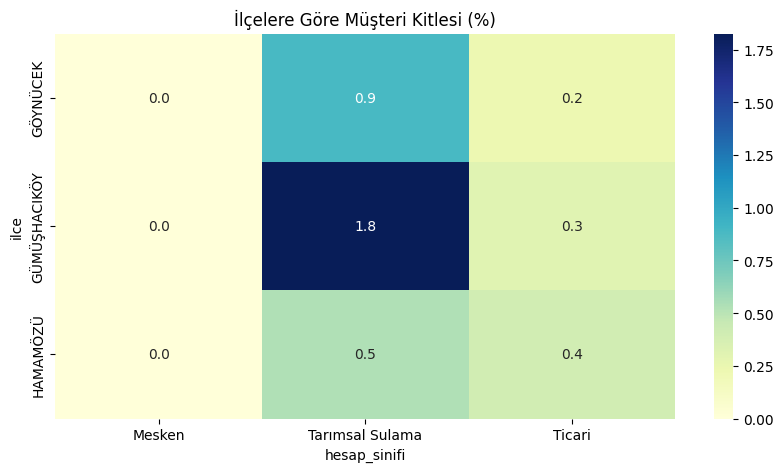

In [22]:
mapping = {1: 'Mesken', 'TA01': 'Tarımsal Sulama', 'T021': 'Ticari'}
ilce_profil_yuzde = ilce_profil_yuzde.rename(columns=mapping)

# En önemli 3 hesap sınfını (Mesken, Tarımsal Sulama, Ticari) grafikte göreceğiz.
plt.figure(figsize=(10, 5))
sns.heatmap(ilce_profil_yuzde[['Mesken', 'Tarımsal Sulama', 'Ticari']], annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('İlçelere Göre Müşteri Kitlesi (%)')
plt.show()

In [ ]:
# Bulgular:Gümüşhacıköy ve Göynücek: "Tarımsal Sulama" oranının en yüksek olduğu bölgelerdir.
# Öte yandan Hamamözü'nde büyük ölçekli sanayi veya yoğun tarımsal sulama olmadığı için tüketim yıl boyu yatay ve düşük seyreder.

# İş Önerisi: Temmuz-Ağustos döneminde Gümüşhacıköy ve Göynücek şebekelerinde aşırı yüklenme riskine karşı önleyici bakım çalışmaları bu aylardan önce tamamlanmalıdır.

In [ ]:
# MÜŞTERİ SEGMENTASYONU
# Problem Tanımı: Müşterileri tüketim miktarı ve ödeme davranışına göre gruplandırmalıyız.

# Hipotez 1: Yüksek tüketimli (Sanayi,Ticari) müşterilerin ödeme disiplini meskenlere göre daha düzenlidir.
# Hipotez 2: Düşük tüketimli ama "Geç Ödeme" yapan büyük bir kitle, toplam operasyonel yükün %80'ini oluşturur.

# Analiz: Müşterileri 3 ana gruba ayıralım:
# Vip (Yüksek Tüketim - Düzenli Ödeme): Sanayi ve büyük ticarethaneler
# Sadık Kitle (Düşük Tüketim - Düzenli Ödeme): Standart mesken kullanıcıları
# Riskli Grup (Düşük Tüketim - Sürekli Geciktiren): Küçük meskenler ve dönemsel kullanıcılar


In [45]:
def segmentlere_ayir(row):
    if row['kwh'] > 500 and row['gec_odeme_sayisi'] == 0:
        return 'Altın Segment'
    elif row['gec_odeme_sayisi'] > 3:
        return 'Riskli Segment'
    else:
        return 'Standart Segment'
# Bu fonksiyon veri setine uygulanıp gec_odeme_sayısı sütunu oluşturulduğunda segmentasyon çalışacaktır.

In [ ]:
#İş Önerisi: Altın Segment için "Özel Müşteri Temsilcisi" atanabilir. Riskli Segment için ise vade tarihinden 2 gün önce otomatik SMS hatırlatma sistemi aktif edilebilir.

In [51]:
# TAHSİLAT PERFORMANS ANALİZİ
# Problem Tanımı: Tahsilat oranımız %86 seviyesinde. Kalan %14'lük dilimin neden ödeme yapmadığını ve "180+ gün" gecikmeye düşen alacakların ortak özelliklerini bulmalıyız.
# Hipotez: Ödeme gecikmesi, fatura tutarı arttıkça değil, fatura dönemi tatil veya hasat sonrasına denk gelince artmaktadır.


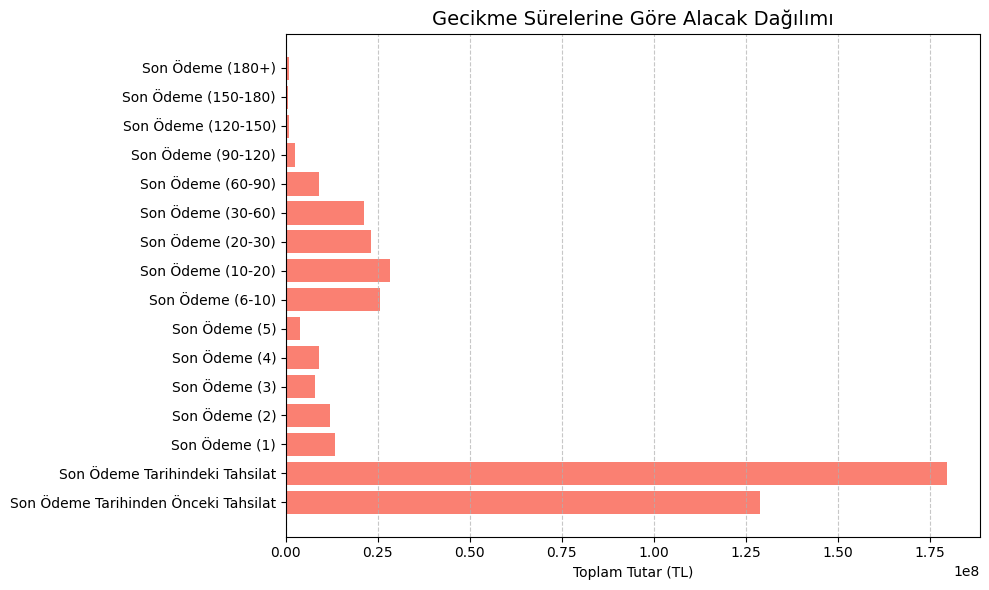

In [52]:
plt.figure(figsize=(10, 6))
plt.barh(gecikme_ozet.index, gecikme_ozet.values, color='salmon')

plt.title('Gecikme Sürelerine Göre Alacak Dağılımı', fontsize=14)
plt.xlabel('Toplam Tutar (TL)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [56]:
# Bulgular: İlk 30 gün içinde müdahale edilmeyen borç, "şüpheli alacak" haline geliyor.
# Veri setinde Gümüşhacıköy veya Göynücek gibi tarımsal ilçelere odaklandığımızda; df_tahakkuk tablosunda "Tarımsal Sulama" (TA01) abonelerinin kWh tüketimleri Temmuz-Ağustos ayında zirve yapmakta.
# df_tahsilat tablosuna baktığımızda, Temmuz ayında kesilen faturalara ait "Ödenen Tarih"'inin çoğunlukla Eylül veya Ekim aylarına ait olduğu görülmekte.
# İş Önerisi: Tarımsal aboneler için "Hasat Vadeli" esnek ödeme planları sunulabilir.